In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import show
import matplotlib
import matplotlib.pyplot as plt
# import earthpy as et
# import earthpy.spatial as es
# import earthpy.plot as ep




import glob
import os

## Import data
Get help/tutorial from https://www.earthdatascience.org/courses/use-data-open-source-python/

### Import Landsat 8 data - VIS/NIR

In [2]:
path = "D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test"
data = sorted(glob.glob(path + "/*.TIF"))
data


['D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_QA_PIXEL.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_QA_RADSAT.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B1.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B2.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B3.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B4.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B5.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B6.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B7.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_QA

In [3]:
for i in range(2, 9):
    band_i = rxr.open_rasterio(data[i], masked = True).squeeze()
    band_corr = band_i*0.0000275-0.2
    globals()[f"band_{i-1}"] = band_corr


In [4]:
band_1.rio.nodata

In [5]:
band_1.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

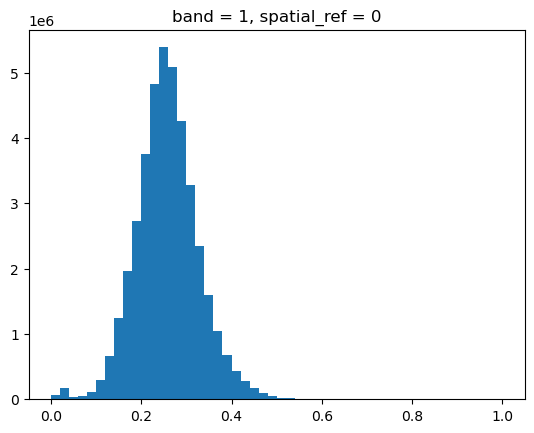

In [6]:
band_5.plot.hist(range=[0.0, 1.0], bins = 50)
plt.show()


In [7]:
print("Max:", np.nanmin(band_2.values))
print("Min:", np.nanmax(band_2.values))


Max: -0.19978
Min: 1.57485


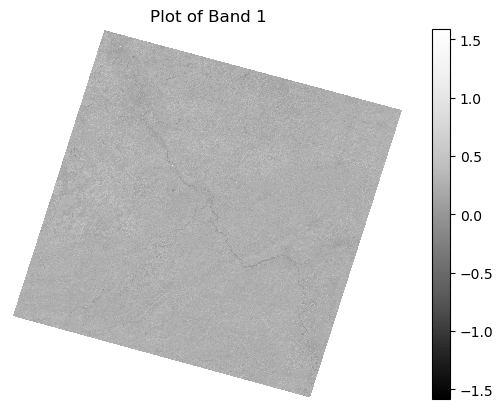

In [8]:
# Plot the data
f, ax=plt.subplots()
band_5.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\nicol\anaconda3\envs\ET_master_project\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


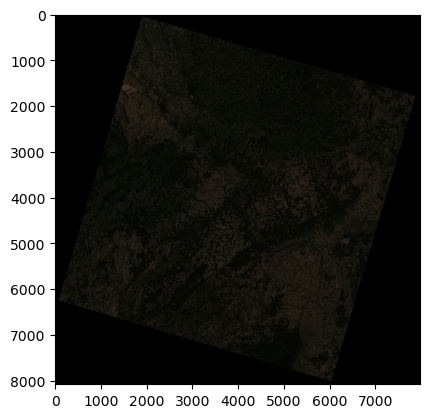

In [9]:
# Create RGB Plot
rgb = np.dstack((band_4, band_3, band_2))
plt.imshow(rgb)

### Import Landsat 8 data - Thermal

In [10]:
band_10 = rxr.open_rasterio(data[11], masked = True).squeeze()


In [11]:
band_10 = band_10*0.00341802+149

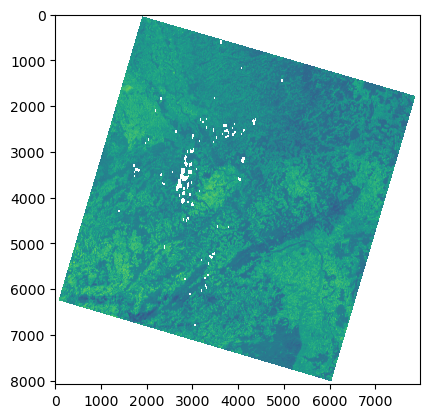

In [12]:
plt.imshow(band_10)

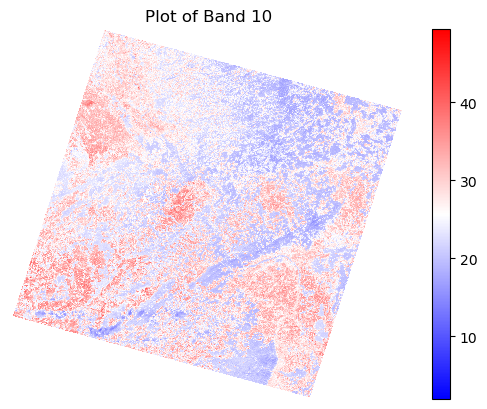

In [13]:
# T in Celsius
band_10_cels = band_10 - 273.15


# Colormap 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["b", "w", "r"], N=256) 




# Plot the data
f, ax=plt.subplots()
band_10_cels.plot.imshow(ax=ax,
                  cmap=cmap)
ax.set_axis_off()
ax.set_title("Plot of Band 10")
plt.show()

## Preprocess data